<a href="https://colab.research.google.com/github/Karolina-Bogacka/transbajki/blob/map_predictions/map_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contextily geopandas > logs.txt

In [2]:
!git clone https://github.com/Karolina-Bogacka/transbajki.git

fatal: destination path 'transbajki' already exists and is not an empty directory.


In [7]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt

import transbajki.utils as utils

from google.colab import drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


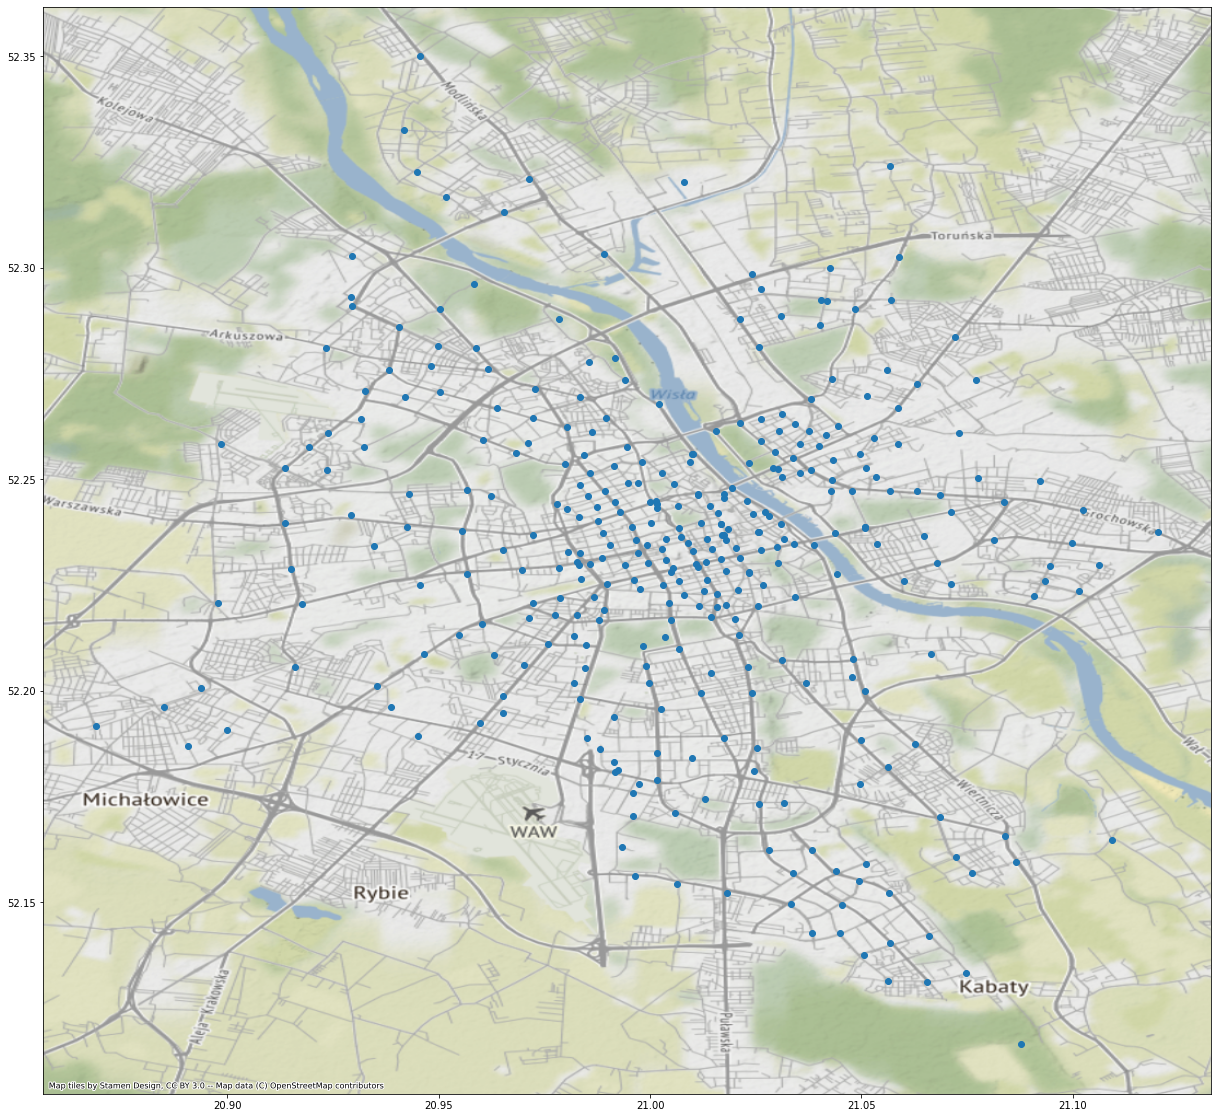

In [4]:

drive.mount('/content/drive')
stations = utils.get_stations()
gpd_stations = gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations.lng, stations.lat), crs='EPSG:4326')
plot_settings = {}
fig, ax = plt.subplots(figsize=(30, 20))
ax = gpd_stations.plot(ax=ax, **plot_settings)
cx.add_basemap(ax=ax, crs=gpd_stations.crs.to_string())

In [13]:
import plotly.express as px
import geopandas as gpd 
 
fig = px.scatter_mapbox(gpd_stations,
                        lat=gpd_stations.lat,
                        lon=gpd_stations.lng,
                        zoom=9.5, mapbox_style='open-street-map')
fig.show()

In [18]:
from google.colab import output
output.enable_custom_widget_manager()

In [19]:

import plotly.graph_objects as go


In [31]:
f2 = go.FigureWidget(data=go.Scattermapbox(lat=list(gpd_stations.lat),
                    lon=list(gpd_stations.lng),
                    mode='markers',
                    marker=dict(size=5, color='green'),
                    ))
f2.update_layout(mapbox_style="stamen-terrain", mapbox_center = {"lat": 52.2297, "lon": 21.0122} #52.2297° N, 21.0122° E
                        , mapbox_zoom= 9
                        , clickmode='event'
                )

FigureWidget({
    'data': [{'lat': [52.296298, 52.290974, 52.290173, ..., 52.208711, 52.229887,
             …